In [91]:
import numpy as np
import time
from tensorflow.python.client import device_lib

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [92]:
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7199634452333350575
]


In [93]:
ITER = 500


# Numpy Performance

In [94]:
X = np.random.randn(1000,1000)
start = time.time()
for i in range(ITER):
    out = np.matmul(X,X)
end = time.time()
print("Time Taken: ",end - start)

Time Taken:  26.955572843551636


# Tensorflow Performance

In [95]:
X = tf.placeholder(shape = (1000,1000),dtype=tf.float32)
start = time.time()
for i in range(ITER):
    out = tf.matmul(X,X)
end = time.time()
print("Time Taken: ",end - start)

Time Taken:  0.6055116653442383


In [96]:
with tf.device('/device:CPU:0'):
    start = time.time()
    for i in range(ITER):
        out = tf.matmul(X,X)
    end = time.time()
print("Time Taken : ",end-start)

Time Taken :  0.4209146499633789


In [97]:
x = tf.placeholder(shape = (1000,1000),dtype=tf.float32)
X = np.random.randn(1000,1000)
out = tf.matmul(x,x)
with tf.device('/device:CPU:0'):
    sess = tf.Session()
    start = time.time()
    for i in range(ITER):
        sess.run(out,feed_dict={
            x:X
        })
    end = time.time()
print("Time Taken : ",end-start)

Time Taken :  18.828800201416016


# Linear Regression Using Tensorflow

In [123]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [110]:
data = load_boston()
X = data.data
y = data.target.reshape((-1,1))

X = (X-X.mean())/X.std()
y = (y-y.mean())/y.std()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [111]:
ones = np.ones((X_train.shape[0],1))
X = np.hstack((ones,X_train))
n,m = X_train.shape[0],X_train.shape[1]

In [112]:
epochs= 20
X = tf.placeholder(dtype = tf.float32,shape = [None,m])
y = tf.placeholder(dtype = tf.float32,shape = [None,1])

In [113]:
W = tf.Variable(tf.random_normal(shape = (m,1)))

In [114]:
y_pred = tf.matmul(X,W)
loss = tf.reduce_mean(tf.square(y-y_pred))
opt = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

In [120]:
train_loss_list= []
test_loss_list =[]
with tf.Session() as sess:
    sess.run( tf.global_variables_initializer() )
    for epo in range(epochs):
        sess.run(opt, feed_dict={
                    X:X_train,
                    y:y_train
                })
        train_loss = sess.run(loss,feed_dict={
            X:X_train,
            y:y_train
        })
        test_loss = sess.run(loss,feed_dict={
            X:X_test,
            y:y_test
        })
        train_loss_list.append(train_loss)
        test_loss_list.append(test_loss)

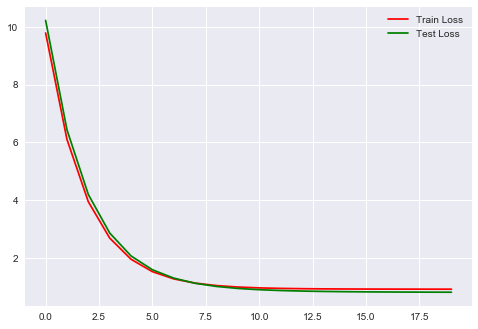

In [125]:
plt.figure()
plt.plot(train_loss_list,label="Train Loss",color="red")
plt.plot(test_loss_list,label="Test Loss",color="green")
plt.legend()
plt.show()